# **Prediksi Analis : Wine Quality Prediction**

# **Pendahuluan**

Topik yang saya bahas di proyek ini yaitu mengenai bidang ekonomi dan bisnis yang dibuat untuk mengetahui prediksi kualitas dari Wine/Anggur merah.

**Memasukkan library yang dibutuhkan**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


**Menyipkan Dataset yang akan diprediksi dengan menggunakan Kredensial Kaggle**

In [ ]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Mengunduh dataset menggunakan Kaggle CLI
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 12.7MB/s]


In [ ]:
# Mengekstrak berkas zip ke direktori aktif saat ini
!unzip /content/red-wine-quality-cortez-et-al-2009.zip

Archive:  /content/red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


**Data Understanding**

Membuat data pada DataFrame dengan menggunakan Pandas

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Exploratory Data Analysis (EDA)**


Explanatory Data Analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

Deskripsi Variabel

In [ ]:
wine.shape

(1599, 12)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Mengubah data numerik menjadi data kategori agar mempermudah analisa selanjutnya

In [ ]:
# Variabel Dependent --> Dalam hal ini variabel dependent merupakan variabel target 
wine.quality.replace(3,'easy', inplace=True)
wine.quality.replace(4,'easy', inplace=True)
wine.quality.replace(5,'medium', inplace=True)
wine.quality.replace(6,'high', inplace=True)
wine.quality.replace(7,'high', inplace=True)
wine.quality.replace(8,'very high', inplace=True)

Melihat informasi yang telah dimuat pada dataset

In [ ]:
def report(wine):
  col = []
  d_type = []
  uniques = []
  n_uniques = []

  for i in wine.columns:
    col.append(i) 
    d_type.append(wine[i].dtypes) 
    uniques.append(wine[i].unique()[:5]) 
    n_uniques.append(wine[i].nunique()) 

  return pd.DataFrame({'Column': col, 'd_type':d_type, 'unique_sample':uniques, 'n_unique_sample':n_uniques})

In [ ]:
report(wine)

,Column,d_type,unique_sample,n_unique_sample
0,fixed acidity,float64,"[7.4, 7.8, 11.2, 7.9, 7.3]",96
1,volatile acidity,float64,"[0.7, 0.88, 0.76, 0.28, 0.66]",143
2,citric acid,float64,"[0.0, 0.04, 0.56, 0.06, 0.02]",80
3,residual sugar,float64,"[1.9, 2.6, 2.3, 1.8, 1.6]",91
4,chlorides,float64,"[0.076, 0.098, 0.092, 0.075, 0.069]",153
5,free sulfur dioxide,float64,"[11.0, 25.0, 15.0, 17.0, 13.0]",60
6,total sulfur dioxide,float64,"[34.0, 67.0, 54.0, 60.0, 40.0]",144
7,density,float64,"[0.9978, 0.9968, 0.997, 0.998, 0.9964]",436
8,pH,float64,"[3.51, 3.2, 3.26, 3.16, 3.3]",89
9,sulphates,float64,"[0.56, 0.68, 0.65, 0.58, 0.46]",96


Deskripsi statistik

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Melakukan penghapusan data dengan nilai yang sama

In [ ]:
print('Jumlah data sebelum dihapus :', wine.shape[0])
wine = wine.drop_duplicates()
print('Jumlah data setelah dihapus :', wine.shape[0])

Jumlah data sebelum dihapus : 1599
Jumlah data setelah dihapus : 1359


Memperbaiki missing value

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Memeriksa kembali apakah ada data yang sama atau tidak

In [ ]:
wine.duplicated().sum()

0

Visualisasi data yang kosong

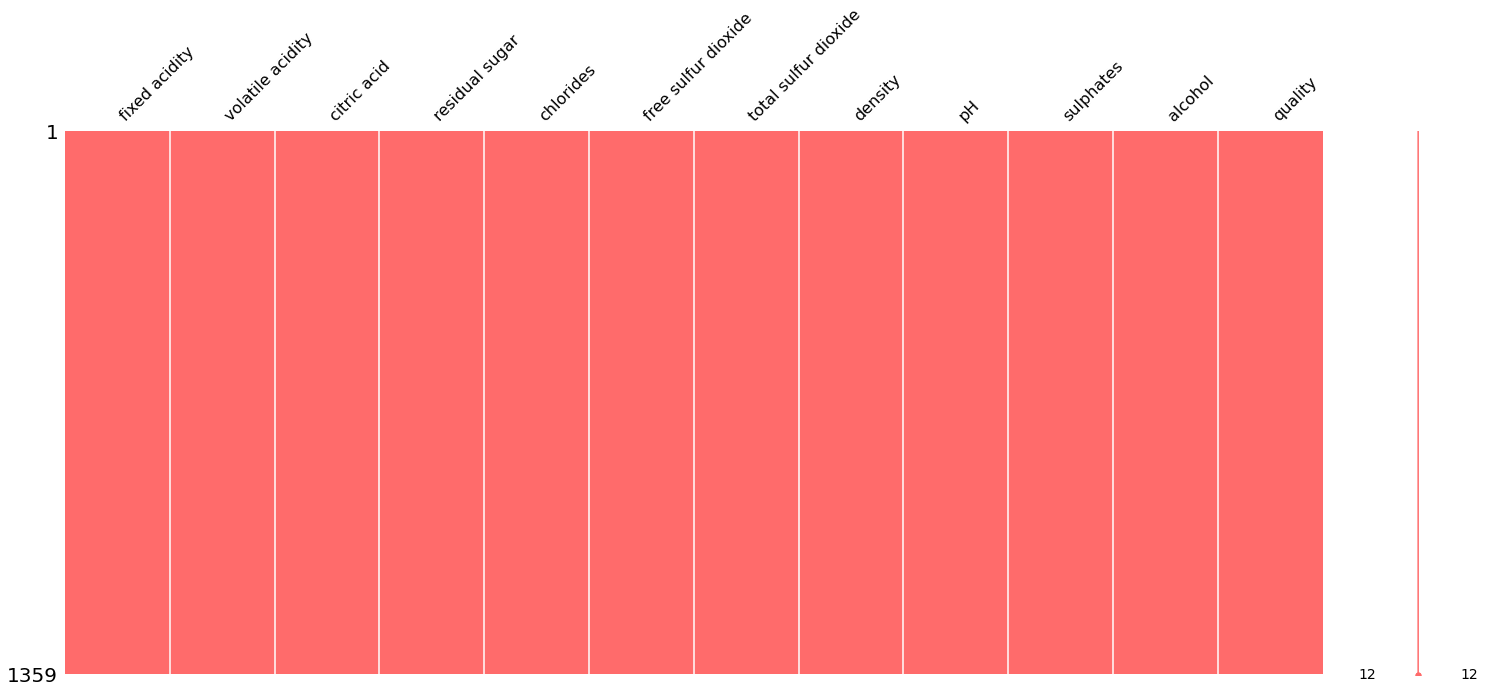

In [ ]:
sorted_null = msno.nullity_sort(wine, sort='descending')
figures = msno.matrix(sorted_null, color=(1, 0.42, 0.42))

Seperti yang terlihat pada data diatas bahwa tidak ada misiing value dan data yang sama

# **Analisa Unvariat**

Membagi fitur pada dataset menjadi 2 bagian yaitu *Numerical* dan *Categorical*

In [ ]:
categorical_features = wine.loc[:, wine.dtypes == 'object'].columns.to_list()
numerical_features = wine.loc[:, wine.dtypes != 'object'].columns.to_list()

Melakukan analisa pada *Categorical features*

           Jumlah  Persentase
high          702        51.7
medium        577        42.5
easy           63         4.6
very high      17         1.3



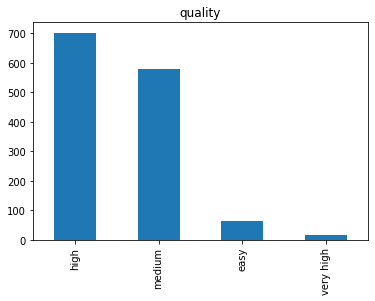

In [ ]:
categorical_features = ['quality']

for column in categorical_features:
  count = wine[column].value_counts()
  percent = 100*wine[column].value_counts(normalize=True)
  new_data = pd.DataFrame({'Jumlah':count, 'Persentase':percent.round(1)})
  print(new_data, end='\n\n')
  count.plot(kind='bar', title=column)
  plt.show()

Melakukan analisa pada *Numerical* features dan melihat *outlier*.

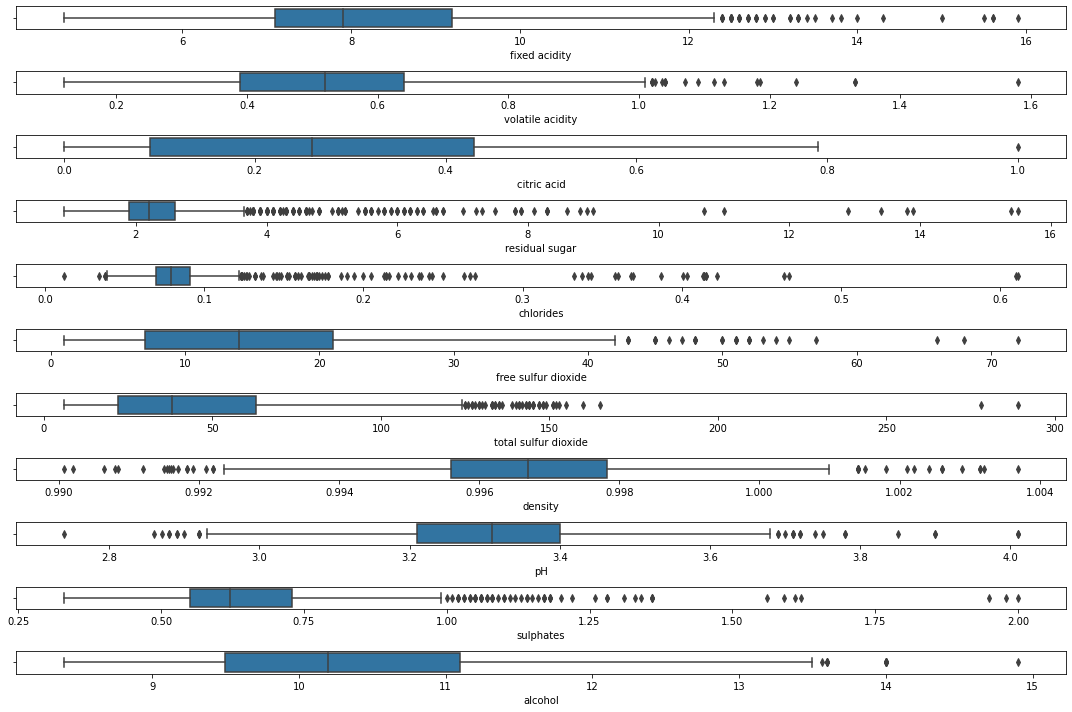

In [ ]:
fig, axs = plt.subplots(len(numerical_features), figsize= (15,10))
i=0
for feature in numerical_features:
  sns.boxplot(wine[feature], ax=axs[i])
  i+=1
  plt.tight_layout()
plt.show()

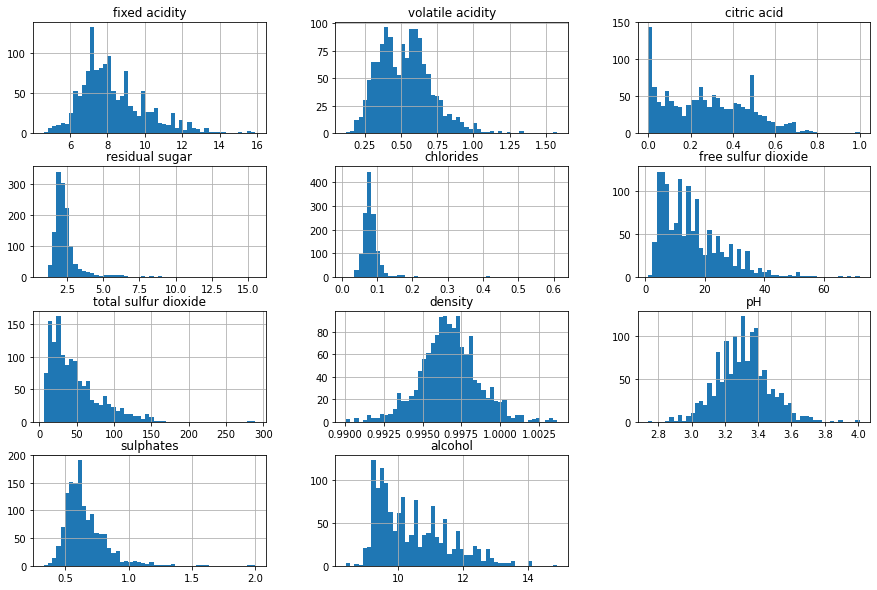

In [ ]:
wine.hist(bins=50, figsize=(15,10))
plt.show()

# **Analisa Multivariat**

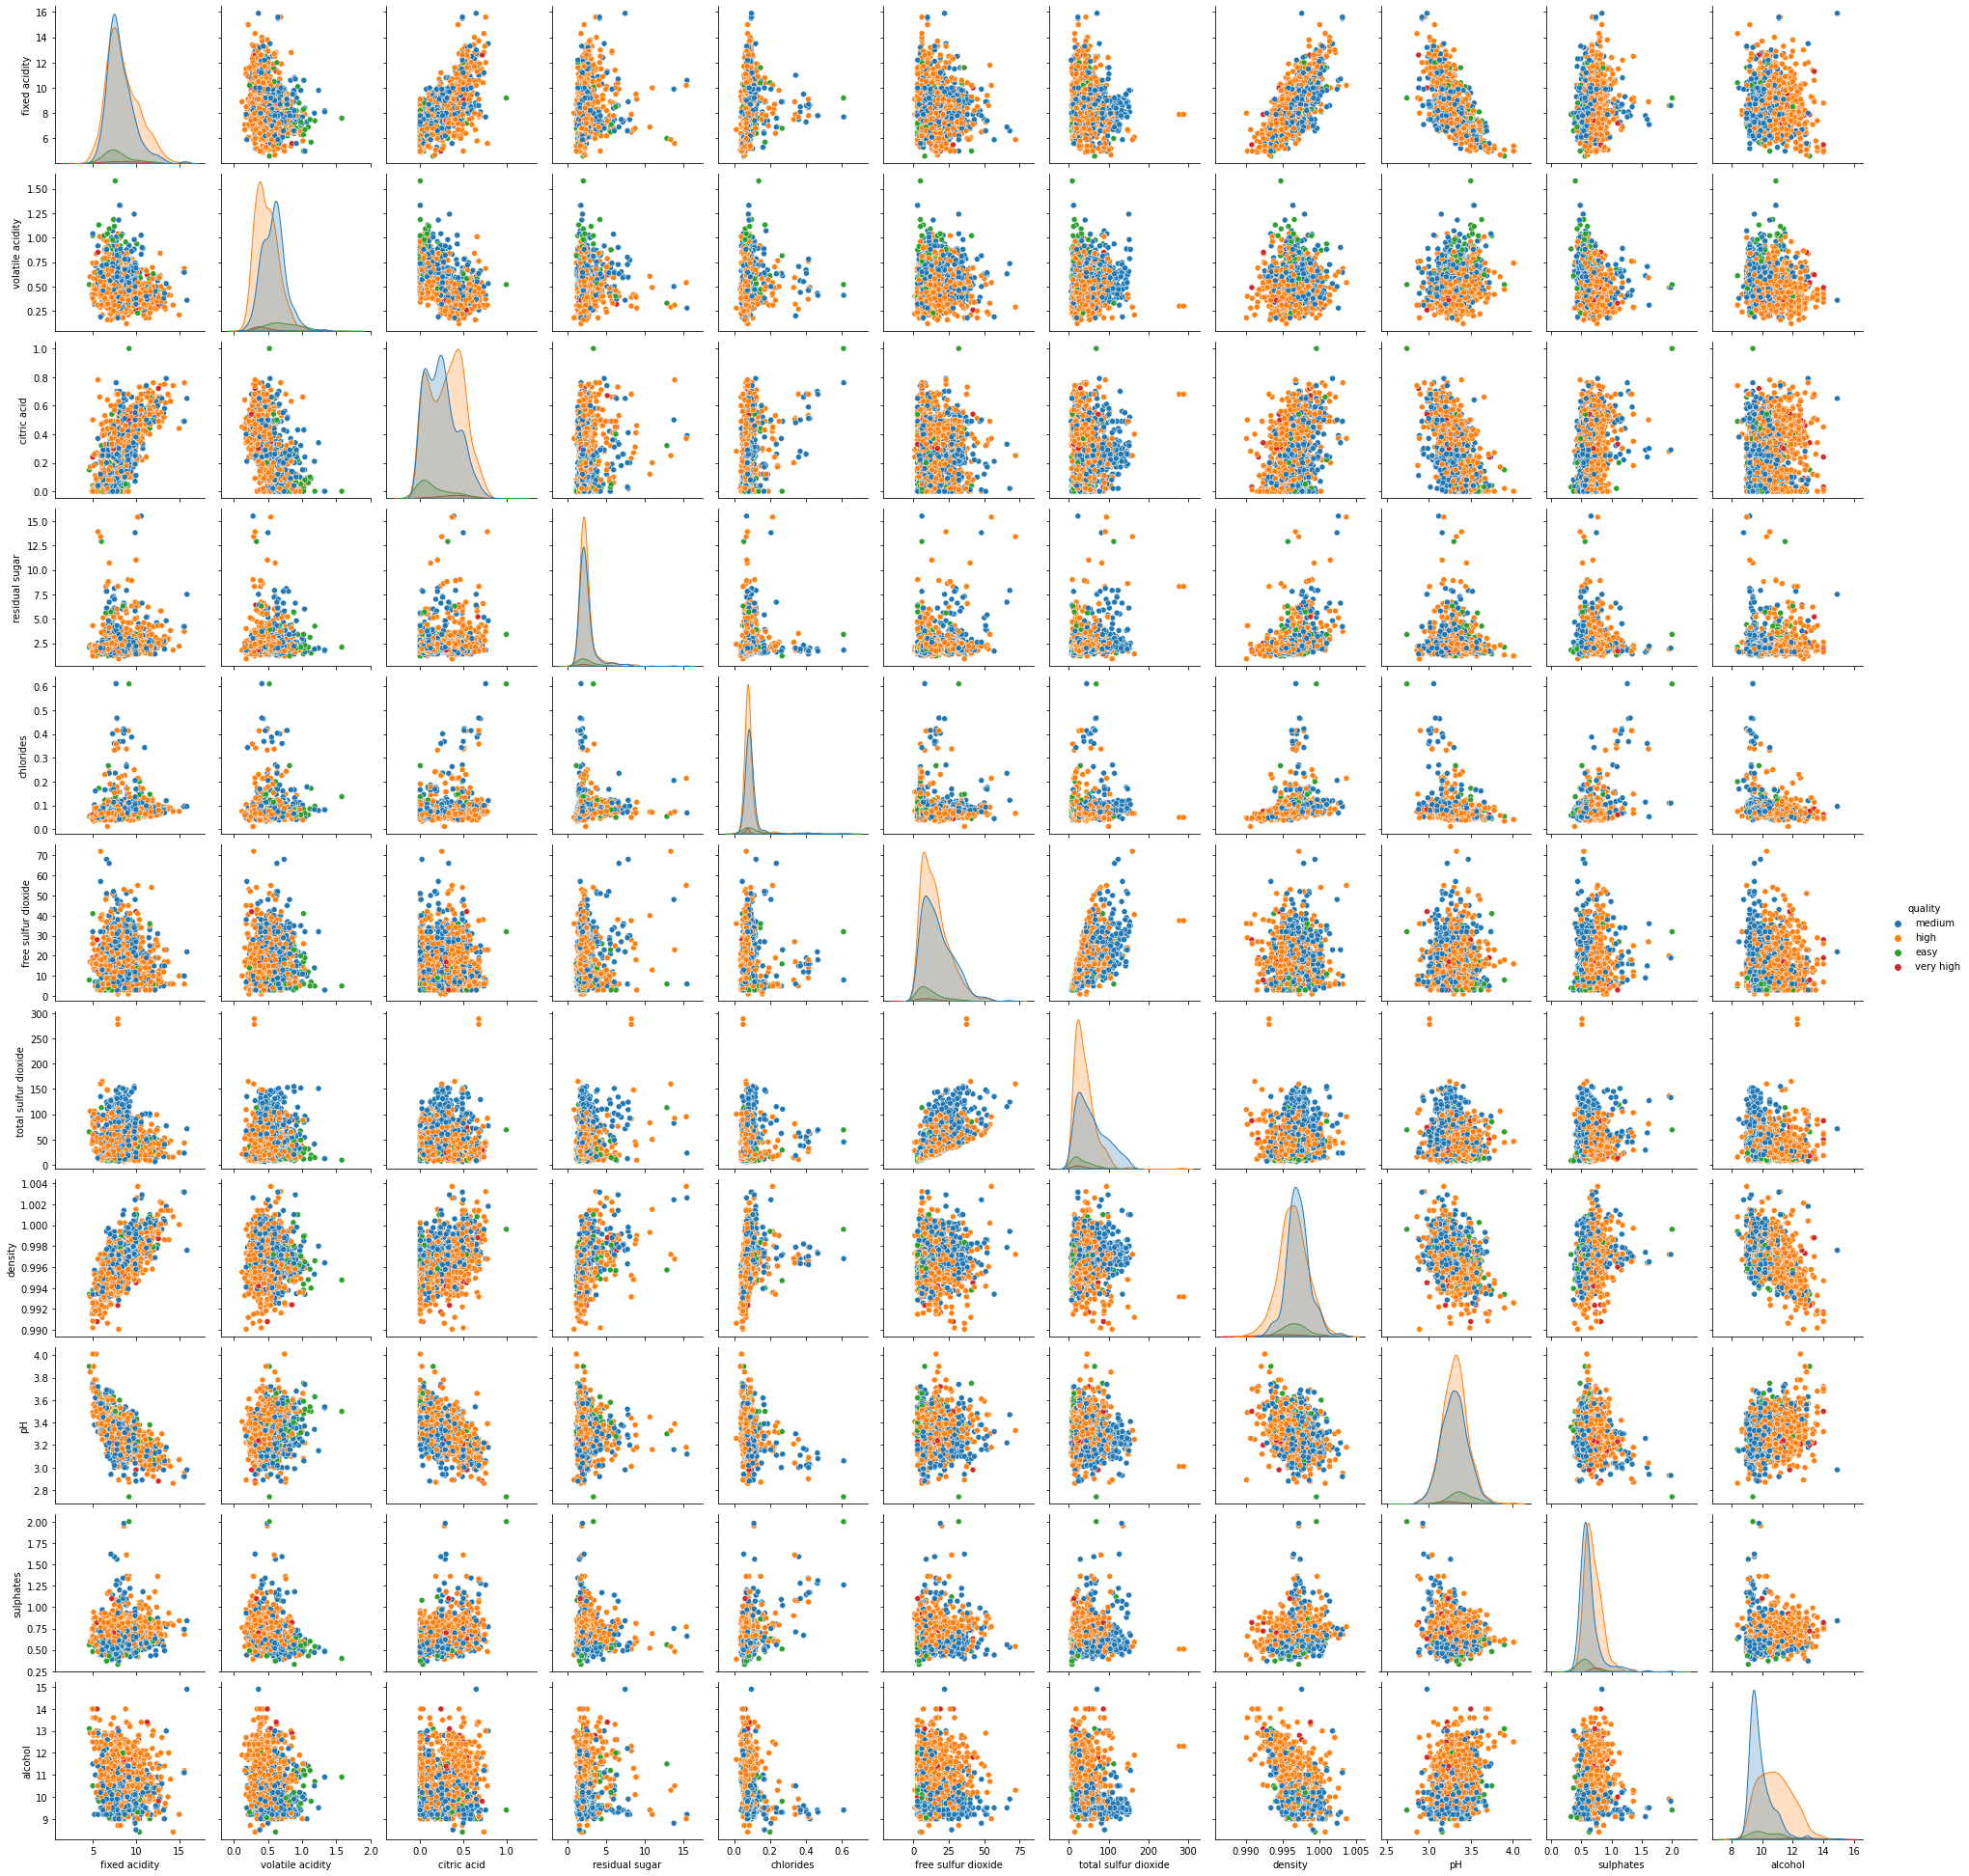

In [ ]:
sns.pairplot(wine, diag_kind = 'kde', hue='quality')

Melakukan pengecekan korelasi

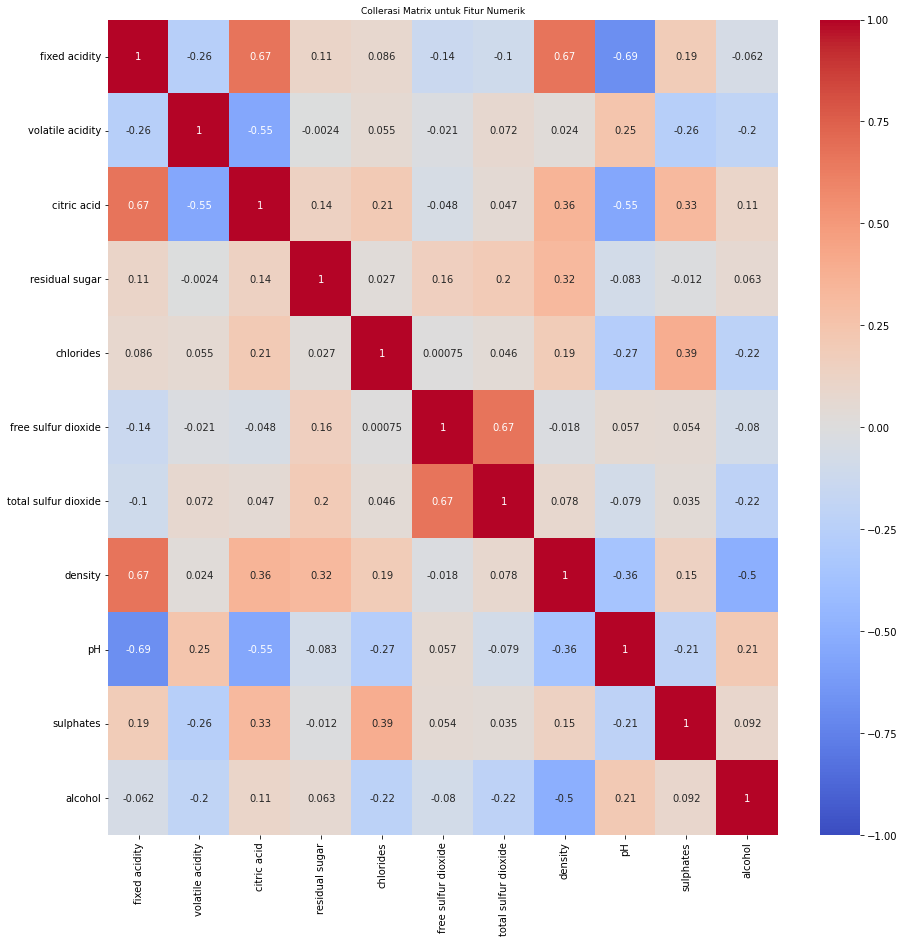

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Collerasi Matrix untuk Fitur Numerik', fontsize=9)
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# **Encoding Fitur Kategori (Categorical Encoding)**

Categorical Encoding adalah proses mengubah data kategori menjadi data numerik

In [ ]:
wine = pd.get_dummies(wine, columns=wine.loc[:, (wine.dtypes == 'object') & (wine.columns != 'quality')].columns.to_list())

Encoding manual dengan memasukan varibel dependet sebagai variabel target

In [ ]:
wine.quality.replace('easy', 3, inplace=True)
wine.quality.replace('easy', 4, inplace=True)
wine.quality.replace('medium', 5, inplace=True)
wine.quality.replace('high', 6, inplace=True)
wine.quality.replace('high', 7, inplace=True)
wine.quality.replace('very high', 8, inplace=True)

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# ***Train-Test-Split***

Pemisahan dataset menjadi 2 bagian yaitu data latih dan data tes

In [ ]:
X = wine.drop('quality', axis=1).values
y = wine['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

print(f'Jumlah seluruh sampel: {len(X)}')
print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah seluruh sampel: 1359
Jumlah data train: 1087
Jumlah data test: 272


Standarisasi nilai pada numeric features dengan StandardScaler

In [ ]:
print(X_train[0:2])
print('')
print(X_test[0:2])

[[10.5     0.24    0.47    2.1     0.066   6.     24.      0.9978  3.15
   0.9    11.    ]
 [12.      0.45    0.55    2.      0.073  25.     49.      0.9997  3.1
   0.76   10.3   ]]

[[ 6.6      0.56     0.14     2.4      0.064   13.      29.       0.99397
   3.42     0.62    11.7    ]
 [ 7.4      0.25     0.29     2.2      0.054   19.      49.       0.99666
   3.4      0.76    10.9    ]]


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
print(X_train[0:2])
print("")
print(X_test[0:2])

[[ 1.24546885 -1.55998078  1.0377373  -0.31961445 -0.48860122 -0.93293517
  -0.68165839  0.57758627 -1.03348422  1.48670214  0.52250763]
 [ 2.10416772 -0.44183209  1.45438458 -0.39045885 -0.31829583  0.85187425
   0.05961562  1.58843198 -1.35754738  0.63393997 -0.12429054]]

[[-0.97802677  0.27585116 -0.66484874 -0.01164399 -0.44181951 -0.28572637
  -0.5359874  -1.49150555  0.69056252 -0.25705702  1.18271224]
 [-0.50541157 -1.64485649  0.05428776 -0.19794776 -0.57869298  0.33976717
   0.08824113 -0.01499355  0.56373402  0.46535858  0.44147323]]


# **Pembuatan Model**

Pada tahap ini pembuatan model dilakukan menggunakan * Support Vector Machine* (SVM) dan *Hyper Parameter Tuning* dari SVM.

Model *baseline* dengan SVM

In [ ]:
# Pembuatan model
baseline_model = SVC()

# Melakukan training
baseline_model.fit(X_train, y_train)

SVC()

In [ ]:
# melakukan ujicoba pada data test
y_pred = baseline_model.predict(X_test)

In [ ]:
# report klasifikasi untuk model baseline
cr_baseline = classification_report(y_test, y_pred, output_dict=True, target_names=['easy', 'medium', 'high', 'very high'])
pd.DataFrame(cr_baseline)

,easy,medium,high,very high,accuracy,macro avg,weighted avg
precision,0.0,0.624000,0.714286,0.0,0.672794,0.334571,0.634097
recall,0.0,0.678261,0.744681,0.0,0.672794,0.355735,0.672794
f1-score,0.0,0.650000,0.729167,0.0,0.672794,0.344792,0.652803
support,13.0,115.000000,141.000000,3.0,0.672794,272.000000,272.000000


In [ ]:
# confusion matrix model baseline
cf_baseline = confusion_matrix(y_test, y_pred)

Pengembangan Model SVM menggunakan Hyper Parameter Tuning dengan GridSearchCV

In [ ]:
# hyperparameter yang akan di tuning
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] 
}

In [ ]:
# Menetapkan StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Pembuatan model untuk GridSearchCV
grid = GridSearchCV(baseline_model, parameters, cv=skf, verbose=1, scoring='accuracy', n_jobs=-1)

# Melakukan Training
grid.fit(X_train,y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best parameter: ", grid.best_estimator_)
print("Score: ", grid.best_score_)

Best parameter:  SVC(C=100, gamma=0.01)
Score:  0.7102540970262643


In [ ]:
# Pembuatan model best parameter
best_model = grid.best_estimator_

# Melakukan training
best_model.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [ ]:
# Pengujian model terhadap data test
y_pred = best_model.predict(X_test)

In [ ]:
# classification report model best parameter
cr_best = classification_report(y_test, y_pred, output_dict=True, target_names=['easy', 'medium', 'high', 'very high'])
pd.DataFrame(cr_best)

,easy,medium,high,very high,accuracy,macro avg,weighted avg
precision,0.500000,0.636364,0.702703,0.0,0.669118,0.459767,0.657217
recall,0.076923,0.669565,0.737589,0.0,0.669118,0.371019,0.669118
f1-score,0.133333,0.652542,0.719723,0.0,0.669118,0.376400,0.655355
support,13.000000,115.000000,141.000000,3.0,0.669118,272.000000,272.000000


In [ ]:
# confusion matrix untuk model best parameter
cf_best = confusion_matrix(y_test, y_pred)

# **Evaluasi Model**

In [ ]:
print("Classification Report untuk Model Baseline")
pd.DataFrame(cr_baseline)

Classification Report untuk Model Baseline


,easy,medium,high,very high,accuracy,macro avg,weighted avg
precision,0.0,0.624000,0.714286,0.0,0.672794,0.334571,0.634097
recall,0.0,0.678261,0.744681,0.0,0.672794,0.355735,0.672794
f1-score,0.0,0.650000,0.729167,0.0,0.672794,0.344792,0.652803
support,13.0,115.000000,141.000000,3.0,0.672794,272.000000,272.000000


In [ ]:
print("Classification Report Model untuk Parameter Terbaik")
pd.DataFrame(cr_best)

Classification Report Model untuk Parameter Terbaik


,easy,medium,high,very high,accuracy,macro avg,weighted avg
precision,0.500000,0.636364,0.702703,0.0,0.669118,0.459767,0.657217
recall,0.076923,0.669565,0.737589,0.0,0.669118,0.371019,0.669118
f1-score,0.133333,0.652542,0.719723,0.0,0.669118,0.376400,0.655355
support,13.000000,115.000000,141.000000,3.0,0.669118,272.000000,272.000000


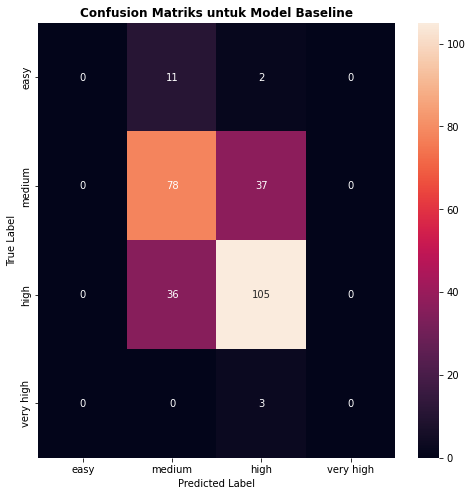

In [ ]:
# Visualisasi hasil prediksi model baseline
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cf_baseline, annot=True, fmt='g')

ax.set_yticklabels(['easy', 'medium', 'high', 'very high'])
ax.set_xticklabels(['easy', 'medium', 'high', 'very high'])

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax.set_title('Confusion Matriks untuk Model Baseline', fontweight='bold')
plt.show()

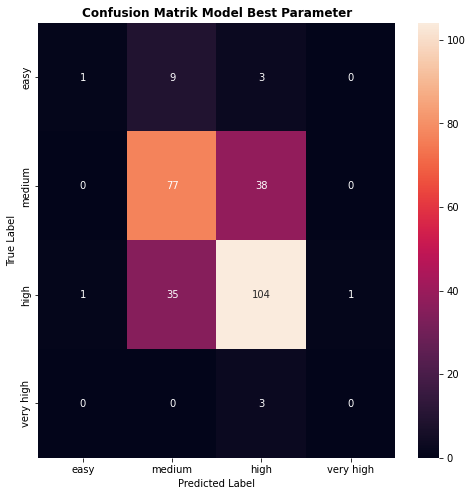

In [ ]:
# Visualisasi hasil prediksi model untuk best parameter
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(cf_best, annot=True, fmt='g')

ax.set_yticklabels(['easy', 'medium', 'high', 'very high'])
ax.set_xticklabels(['easy', 'medium', 'high', 'very high'])

ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax.set_title('Confusion Matrik Model Best Parameter', fontweight='bold')
plt.show()